<img src="./img/titanic.jpg" height="480px">
<p>위 그림은 영화 타이타닉 포스터이다. 레오나르도 디카프리오와 케이트 윈슬릿을 스타로 만들어준 영화로 유명하며, 실제 타이타닉호의 침몰을 배경으로 한 영화이다. 실제 고증을 많이 한 영화이면서 재난 영화의 모범으로 알려져 있다. 영화에서는 배에 탑승한 상류층 인사들의 추태가 나오지만, 그 근거는 희박하고 오히려 자기 삶을 희생한 사람이 많았다고 한다. 이 부분을 이 장에서 데이터를 통해 확인할 수 있을 것 같다.<br/>
타이나익 침몰 사건에 관한 내용은 위키 백과사전을 인용하겠다.<br/>
<quote>RMSRMS 타이타닉(영어: RMS Titanic)은 영국의 화이트 스타 라인이 운영한 북대서양 횡단 여객선이다. 1912년 4월 10일 영국의 사우샘프턴을 떠나 미국의 뉴욕으로 향하던 첫 항해 중에 4월 15일 빙산과 충돌하여 침몰하였다. 타이타닉의 침몰로 1,514명이 사망하였으며, 이는 평화 시 해난 사고 가운데 가장 큰 인명피해이다.</quote><br/>
타이타닉은 선내에 체육관, 수영장 등의 시설을 갖춘 당시 최대 여객선이었다.<br/>
이 배에 대한 상세한 이야기는 많은 다큐멘터리와 책에서 다루어져 있으니 읽어보길 권장한다. 정말 많은 이야기를 알 수 있다.<br/>
타이타닉 생존자 예측하기는 인공지능 알고리즘을 학습할 때 많은 사람이 예제처럼 다루는 일종의 토이프로젝트(Toy Project)이다. 일단 국제선이다 보니 탑승객의 정보가 상세해서 데이터 측면에서 학습에 사용할 특징이 많다. 타이타닉 생존자 예측하기는 다음의 질문에 답하는 인공지능 모델을 만드는 것과 같다고 생각하면 된다.</p>  

 - 어머니와 약혼자와 함께 1등실에 탑승한 17세 여성의 생존 확률은 얼마일까?
 - 부모 형제 없이 혼자 3등실에 탑승한 19세 남성의 생존 확률은 얼마일까?

<p>이런 질문에 답할 수 있는 모델을 만들고, 실제 그 모델에 질문을 해서 답을 얻는 과정을 설명하려고 한다. 참고로 첫 번째 질문은 영화에서 케이트 윈슬릿이 연기한 로즈의 데이터이고, 두 번째 질문은 레오나르도 디카프리오가 연기한 잭의 데이터이다. 영화에서 이 두 주인공은 가상의 인물이지만, 실제 타이타닉의 생존자 데이터를 이용해서 이들의 생존율을 계산해 보는 것이다. 그래서 이 장은 이전 장도 마찬가지였지만, 사용되는 명령의 옵션 하나하나에 신경 쓰기보다는 전체 흐름을 그냥 따라 오는 것에 중점을 두면 좋을 듯 하다.</p>

## 7.1 데이터 읽고 전체 상황 확인하기

In [1]:
#In [1]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

6장에서 잠시 배운 seaborn을 포함해서 numpy, pandas, matplotlib를 import한다.  
그리고 https://github.com/PinkWink/playing_data 에 접속하여 titanic.xls 파일을 './data' 폴더에 저장한다.

In [2]:
#In [2]
raw_data = pd.read_excel('./data/titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


titanic.xls는 타이타닉호의 생존자 데이터이다. 이 엑셀 파일을 pandas로 읽는다.

In [3]:
#In [3]
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


pandas의 describe() 명령은 간단한 통계적 개요를 알려준다. 각 데이터의 의미는 아래와 같다.
 - pclass : 탑승한 선실의 등급으로 1등실이 가장 좋고, 3등실이 가장 저렴한 객실
 - survived : 생존 여부로 1이면 생존, 0이면 미생존
 - age : 나이
 - sibsp : 함께 탑승한 형제자매나 배우자의 수
 - parch : 함께 탑승한 부모나 자녀의 수
 - fare : 탑승 당시 요금

단순 통계적 개요에서는 survived 항목의 평균값에서 생존율이 38.20%였음을 알 수 있다. 탑승 객 중 가장 나이가 어린 탑승객은 생후 2개월 된 아기였다는 것도 알 수 있다.

In [4]:
#In [4]
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


실제 생존 데이터는 코드 4의 결과와 같이 생겼다. 데이터를 찬찬히 들여다보면서 진행하겠다.

## 7.2 데이터 개요를 그래프로 확인하기

c:\Users\tom99\anaconda3\envs\study36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


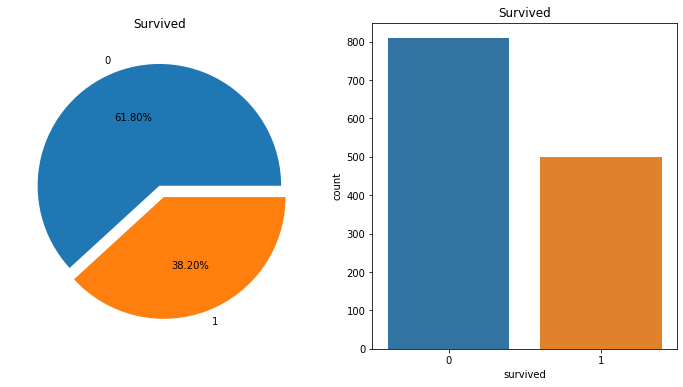

In [5]:
#In [5]
f, ax = plt.subplots(1, 2, figsize=(12, 6))

raw_data['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0])

ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived', data=raw_data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

raw_data에 전체 탑승객 정보가 있는데, 그중에 survived 정보를 파이 그래프로 그려보았다. value_counts()를 이용하면 해당 항목(survived)의 숫자를 합쳐서 바로 그림을 그려준다. 생존율이 38.20%인 것을 파이 그래프로 바로 알 수 있으며, 그 수는 500명 쯤이었다는 것도 알 수 있다.

<AxesSubplot:>

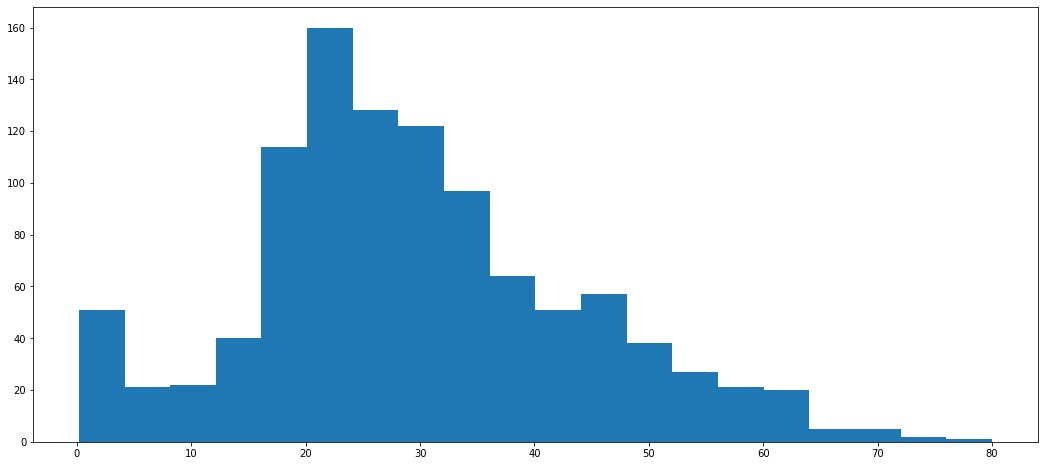

In [6]:
#In [6]
raw_data['age'].hist(bins=20, figsize=(18, 8), grid=False)

전체 탑승객 정보(raw_data)에서 age 항목의 히스토그램(hist)을 그렸다. 0세에서 4세사이 아기들의 숫자가 다른 어린이들에 비해 많았음을 알 수 있다. 실제 타이타닉에는 아메리칸 드림을 꿈꾸며 새로운 보금자리를 얻기 위해 아기를 안고 가족 단위로 탑승한 가난한 가족이 많았다고 한다.

In [7]:
#In [7]
raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


groupby 명령을 사용하면, 지정된 칼럼을 index로 데이터로 재정렬해준다. groupby를 이용해서 탑승 선실의 등급으로 데이터를 다시 보자. 가장 비싼 1등실의 평균 연령이 가장 높고, 3등실의 평균 연령이 가장 낮다. 요금도 당연히 1등실이 높다. 그런데, 생존율도 무려 62.0% 1등실이 가장 높다. 25.53%인 3등실과 비교하면 차이가 엄청나다. 이 데이터만 보면 상류층 사람들이 많이 살아남은 것으로만 보인다. 그러나 타이타닉에서는 그렇지 않다. 단순히 평균만으로는 그렇지 않다는 것을 하나씩 확인해보자.

In [8]:
#In [8]
raw_data.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


Pandas가 제공하는 corr() 함수는 상관계수를 계산해주는 함수이다. 이런 상관계수는 seaborn의 heatmap과 함께 보면 시각적 효과가 좋다.

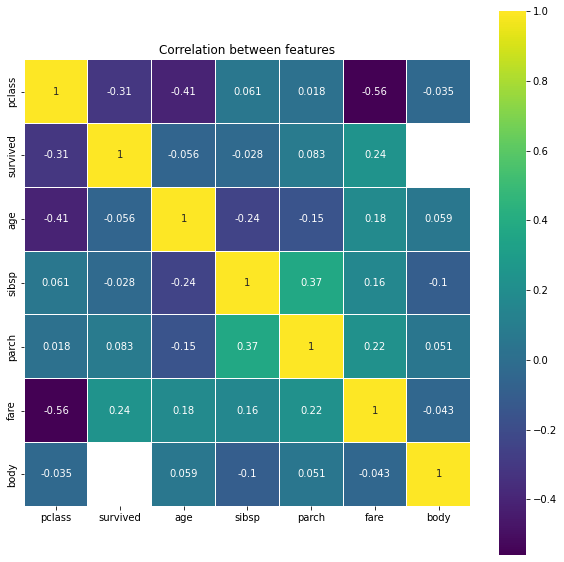

In [9]:
#In [9]
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

코드 9는 코드 8을 시각적으로 효과를 주기 위해 heatmap을 적용한 것이다. 상관계수는 두 데이터의 상관관계만 확인하는 것으로 인과관계로 생각하면 안된다.  
결과만 보면, 선실 등급(pclass)이 낮을수록 생존율(survived)이 높아지는 관계에 있다는 것과 선실 등급(pclass)이 낮을수록 탑승객의 나이가 많아진다는 것을 알 수 있다.  
이것은 코드 7에서 확인한 것과 별반 다르지 않다.

코드9는 코드 8을 시각적으로 효과를 주기 위해 heatmap을 적용한 것이다. 상관계수는 두 데이터의 상관관계만 확인하는 것으로 인과관계로 생각하면 안된다. 결과만 보면, 선실 등급(pclass)이 낮을 수록 생존율(survived)이 높아지는 관계에 있다는 것과 선실 등급(pclass)이 낮을수록 탑승객의 나이가 많아진다는 것을 알 수 있다. 이것은 코드 7에서 확인한 것과 별반 다르지 않다.

## 7.3 나이별 구별 및 성별 생존율 확인하기

In [10]:
#In [10]
raw_data['age_cat'] = pd.cut(raw_data['age'], bins=[0, 3, 7, 15, 30, 60, 100], include_lowest=True, labels=['baby', 'children', 'teenage', 'young', 'adult', 'old'])
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


이번에는 나이 등급(age_cat)을 만들어서 구분해서 관찰을 해보려고 한다. pandas가 제공하는 cut 함수를 사용해서 나이 기준을 만들고, 그 각각에 이름(labels)을 붙일 수 있다. 0세부터 3세는 baby, 3세부터 7세까지는 children 이런 식으로 나이 데이터를 등급화하고 이를 관찰해보자.

In [11]:
#In [11]
raw_data.groupby('age_cat').mean()

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


이 데이터는 코드 7과는 또 조금 다른 결과를 준다. baby 등급에 가까운 연령대일수록 3등실에 많이 탑승했다는 것이다. 그러면 코드 7이나 코드 9의 결과로 이 baby 등급의 생존율이 낮아야 하지만, 타이타닉에서는 baby 등급일수록 생존율이 높다. adult나 old로 갈수록 선실 등급이 1등실에 가까워지지만, 생존율은 낮아진다. 이 결과는 확실히 코드 7의 결과와 달라 보인다. 평균의 함정이다. 조금 더 데이터를 들여다보자.

c:\Users\tom99\anaconda3\envs\study36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\tom99\anaconda3\envs\study36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\tom99\anaconda3\envs\study36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  

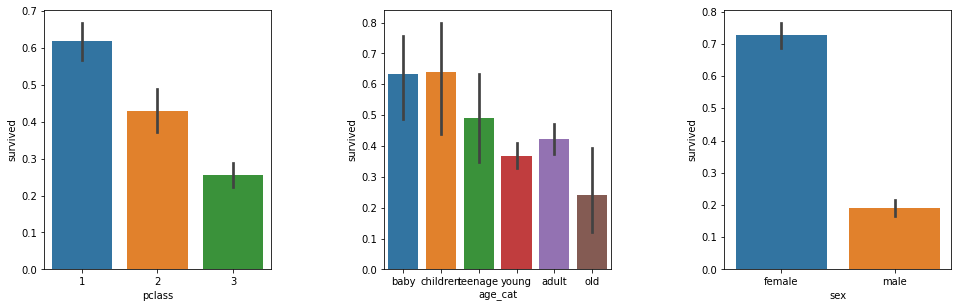

In [12]:
#In [12]
plt.figure(figsize=[14, 4])
plt.subplot(131)
sns.barplot('pclass', 'survived', data=raw_data)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=raw_data)
plt.subplot(133)
sns.barplot('sex', 'survived', data=raw_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

이렇게 하면 확실히 코드 7의 결과에서 보듯이 1등실이 가장 생존율이 높아 보이지만, 나이가 어린 승객도 높은 생존율을 보인다. 특히 여성(female)의 생존율이 매우 높다는 것도 알 수 있다. 기록을 보면, 타이타닉은 여성과 어린이 먼저 구출한다는 원칙이 잘 지켜진 배이다. 자신의 생명을 여성과 어린이들에게 희생한 젊은 남성들이 많았다는 것이다. 타이타닉호에는 부모 형제 없이 홀로 미국으로 떠나는 가난한(3등실에 탑승한) 남성들이 많았다고 한다. 코드 12의 그래프가 보여주는 결과는 이런 배경을 알고 나면 이해가 된다.

c:\Users\tom99\anaconda3\envs\study36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\tom99\anaconda3\envs\study36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


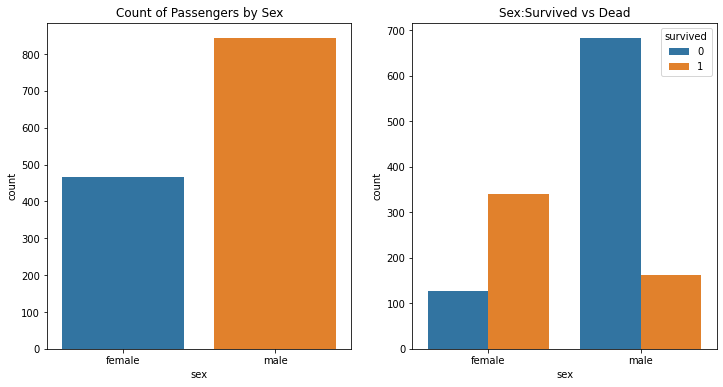

In [13]:
#In [13]
f, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot('sex', data=raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('sex', hue='survived', data=raw_data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

여성과 남성의 생존 상황을 조금 더 상세히 보면 탑승객의 수는 여성이 450명으로 850명쯤 되는 남성의 절반 정도였다. 그러나 생존 자체는 여성이 350명이 조금 안되는 수로 150명 정도 생존한 남성보다 훨씬 많았다. 이것만 봐도 구명보트에 탑승한 여성의 수가 많았고, 여성/아이 우선 원칙을 지키며 현장을 지휘한 선원들과 그 지휘를 따른 남성들이 있었다는 의미이다.

## 7.4 보트 탑승 승객의 생존율 확인하기

우리가 가진 데이터에는 boat라는 칼럼이 있다. 이 항목은 구명보트에 탑승했다면 보트 넘버가 쓰인 것이다. 보트에 탑승한 승객들의 상황을 보도록 하자.

In [14]:
#In [14]
boat_survivors = raw_data[raw_data['boat'].notnull()]
boat_survivors.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult


먼저 boat항목의 NaN이 아닌 항목만 데이터로 받는다.

c:\Users\tom99\anaconda3\envs\study36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


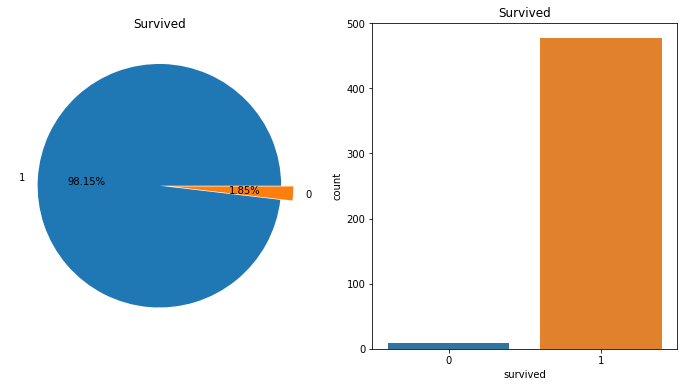

In [15]:
#In [15]
f, ax=plt.subplots(1, 2, figsize=(12, 6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived', data=boat_survivors, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

구명보트에 탑승한 사람들은 98.15% 생존했다. 그래서 나중에 생존자를 예측하기 위한 모델을 만들 때는 이 항목(칼럼)은 특징으로 잡으면 안된다. 그러면 보트 탑승 여부만 확인할테니까 말이다.

## 7.5 귀족들의 생존율만 다시 조사하기

코드 7에서 상류층(선실 등급 1등실)이 많이 살아남은 듯하지만, 어린아이와 여성들의 생존율도 높다는 것을 7-3절에서 이야기 했었다. 이번에는 상류층(귀족)의 생존율을 조사해보자. 물론 상류층이라고 1등실을 탄 것은 아니겠지만, 그래도 당시 타이타닉의 상류층의 생존율을 보면서 그들이 어떤 결과를 맞이했는지는 확인해 볼 수 있을 것 같다.

In [16]:
#In [16]
raw_data['name'][0]

'Allen, Miss. Elisabeth Walton'

raw_data에느 ㄴ이름을 적는 항목에 호칭이 포함되어 있다.

In [17]:
#In [17]
raw_data['name'][0].split(',')[1]

' Miss. Elisabeth Walton'

먼저, 콤마(,)로 구분된 문자열을 분리(split)하고 두 번째를 선택한다.

In [18]:
#In [18]
raw_data['name'][0].split(',')[1].split('.')[0].strip()

'Miss'

그리고 앞뒤에 혹시 스페이스가 있을 수 있으니까 strip() 함수로 제거한다.

In [19]:
#In [19]
test = lambda x: x+2
test(2)

4

기초적인 것으로 람다함수가 있다. 위 코드에서 보이듯이 람다(lambda) 함수는 간편하게 한 줄로 함수 기능을 생성할 수 있다.

In [20]:
#In [21]
list(map(test, range(5)))

[2, 3, 4, 5, 6]

이렇게 map 함수를 이용해서 리스트형 각 변수에 람다함수를 각각 적용할 수 있다. 코드 16부터 21까지를 합치면 코드 22처럼 호칭이 포함된 이름 정보에서 귀족이든 혹은 단순히 성별을 지칭하든 호칭만 빼내서 별도의 칼럼을 구성할 수 있다.

In [21]:
#In [22]
conversion_rare = lambda x: x.split(',')[1].split('.')[0].strip()
raw_data['title'] = raw_data['name'].map(conversion_rare)

titles = raw_data['title'].unique()
titles

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

이렇게 추출한 호칭으로 title이라는 칼럼을 만들고, 유일한 내용만 조사하는 unique() 검사를 수행하면 코드 22의 결과를 볼 수 있다. 여기서 귀족의 호칭을 분리하면 된다.

In [22]:
#In [23]
pd.crosstab(raw_data['title'], raw_data['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


pandas의 crosstab 명령은 지정된 칼럼을 인덱스로 하고, 두 번재 지정된 칼럼에 대한 개수를 알려준다. 여성 귀족은 Lady와 Countess 뿐이어서, 귀족의 성별을 구분하는 것은 큰 의미가 없을 것 같다.  
이 중 Mlle와 Ms.Mme는 각각 Miss, Miss, Mrs로 변경한다. 그리고 Miss과 Mrs, Mr를 제외한 나머지 호칭은 귀족으로 보고 rare라고 해 두겠다.

In [23]:
#In [24]
raw_data['title'] = raw_data['title'].replace('Mlle', 'Miss')
raw_data['title'] = raw_data['title'].replace('Ms', 'Miss')
raw_data['title'] = raw_data['title'].replace('Mme', 'Mrs')

Rare = ['Lady', 'the Countess', 'Capt', 'Master', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']

for each in Rare:
    raw_data['title'] = raw_data['title'].replace(each, 'Rare')

raw_data['title'].unique()

array(['Miss', 'Rare', 'Mr', 'Mrs'], dtype=object)

코드 24에서 1~3행은 단지 Miss의 다 말인 Mlle과 Ms를 Miss로 변경(replace)하는 것이고, Mme를 Mrs로 변경하는 것이다. 귀족 등급의 단어를 Rare라는 리스트형 변수에 저장하고, 이 변수를 for문으로 반복한다. 그래서 Rare에 있는 단어를 만날 때마다 해당 단어를 Rare로 변경한다.

In [24]:
#In [25]
print(raw_data[['title', 'survived']].groupby(['title'], as_index=False).mean())

  title  survived
0  Miss  0.678030
1    Mr  0.162483
2   Mrs  0.787879
3  Rare  0.466667


코드 25의 결과와 코드 7의 결과, 코드 12의 결과를 잘 보자. 코드 25의 결과를 보면, 일반 남성(Mr)의 생존율은 고작 16.25%이다. 물론 귀족이 많이 살긴 했지만, 46.67%로 절반이 안되며, 여성의 생존율보다 낮다. 이를 단순히 코드 7의 결과만 보고 상류층만 살아남았다고 말하기 어렵다.

## 7.6 학습을 위한 데이터 정리와 특징 선택하기

In [25]:
#In [26]
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


코드 26에는 현시점의 raw_data가 보인다. 이제 우리는 6장에서 배운 결정나무 알고리즘을 사용해서 모델링을 하려고 한다. 먼저, female/male로 된 성별을 숫자로 변경해야 할 것같다.

In [26]:
#In [27]
tmp = []
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(0)
    elif each == 'male':
        tmp.append(1)
    else:
        tmp.append(np.nan)

반복문을 이용해서 성별에서 female을 만나면 0, male을 만나면 1을, tmp라는 빈 리스트에 append로 추가한다.

In [27]:
#In [28]
raw_data['sex'] = tmp
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


그리고 성별 칼럼은 다시 갱신한다. 이제, 중요한 특징을 선택해야 한다. 확실한 건 성별(sex)과 선실 등급(pclass)은 특징으로 잡아야 한다. 거기에 형제/배우자를 의미하는 sibsp와 부모/자녀를 의미하는 parch도 포함하고, 요금도 포함한다. 구명보트의 탑승 여부는 7-4절에서 이야기한 대로 특징으로 잡으면 안된다.

In [28]:
#In [29]
raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1.0,0.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


그리고 정보가 없는 NaN을 빼고 다시 저장해서 전체 데이터가 조금 줄어든다.

In [29]:
#In [30]
raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   float64 
 1   survived   1045 non-null   float64 
 2   name       1045 non-null   object  
 3   sex        1045 non-null   float64 
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   float64 
 6   parch      1045 non-null   float64 
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
dtypes: category(1), float64(8), object(7)
memory usage: 131.8+ KB


## 7.7 생존자 예측을 위한 모델 수립

In [30]:
#In [31]
train_pre = raw_data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]

이제 raw_data에서 학습에 사용할 특징으로 코드 31에서 보듯이 pclass, sex, age, sibsp, parch, fare로 하겠다. 그 데이터만 따로 train_pre에 저장한다.

In [31]:
#In [32]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_pre, raw_data[['survived']], test_size=0.1, random_state=13)

아직 인공지능이나 머신러닝을 배우지 않은 사람도 있을 것이다. 여기서 코드 32의 train_test_split 함수가 하는 일은, 데이터를 훈련용과 검증용으로 나누는 것이다. 전체 데이터의 10%를 test 데이터로 두고, 훈련용 데이터 X_train와 훈련용 데이터의 라벨(raw_data[['survived']]), 검증용 데이터 X_test와 라벨을 분리한다. 나중에 훈련용 데이터로 모델을 수립하고, 그 모델을 검증용 데이터로 확인한다.

In [32]:
#In [33]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  940 non-null    float64
 1   sex     940 non-null    float64
 2   age     940 non-null    float64
 3   sibsp   940 non-null    float64
 4   parch   940 non-null    float64
 5   fare    940 non-null    float64
dtypes: float64(6)
memory usage: 51.4 KB


In [33]:
#In [34]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  105 non-null    float64
 1   sex     105 non-null    float64
 2   age     105 non-null    float64
 3   sibsp   105 non-null    float64
 4   parch   105 non-null    float64
 5   fare    105 non-null    float64
dtypes: float64(6)
memory usage: 5.7 KB


In [34]:
#In [35]
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  940 non-null    float64
dtypes: float64(1)
memory usage: 14.7 KB


In [35]:
#In [36]
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [36]:
#In [37]
X_train.head()

,pclass,sex,age,sibsp,parch,fare
710,3.0,0.0,37.0,0.0,0.0,7.7500
423,2.0,1.0,34.0,0.0,0.0,13.0000
646,3.0,0.0,38.0,1.0,5.0,31.3875
596,2.0,1.0,31.0,0.0,0.0,13.0000
286,1.0,0.0,63.0,1.0,0.0,221.7792


코드 37에서 보듯이 인덱스가 애초에 raw_data에 붙여 있던 번호가 된다. 이 번호를 다시 0부터 세팅하는 작업을 한다.

In [37]:
#In [38]
X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis=1)

X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)

이제 6장에서 수행한 것과 같이 sklearn에서 DecisionTreeClassifier를 import하고 모델을 수립(fit)한다.

In [38]:
#In [39]
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(X_train, y_train)

print('Score: {}'.format(tree_clf.score(X_train, y_train)))

Score: 0.8117021276595745


훈련용 데이터에서 정확도는 81.2%정도이다.

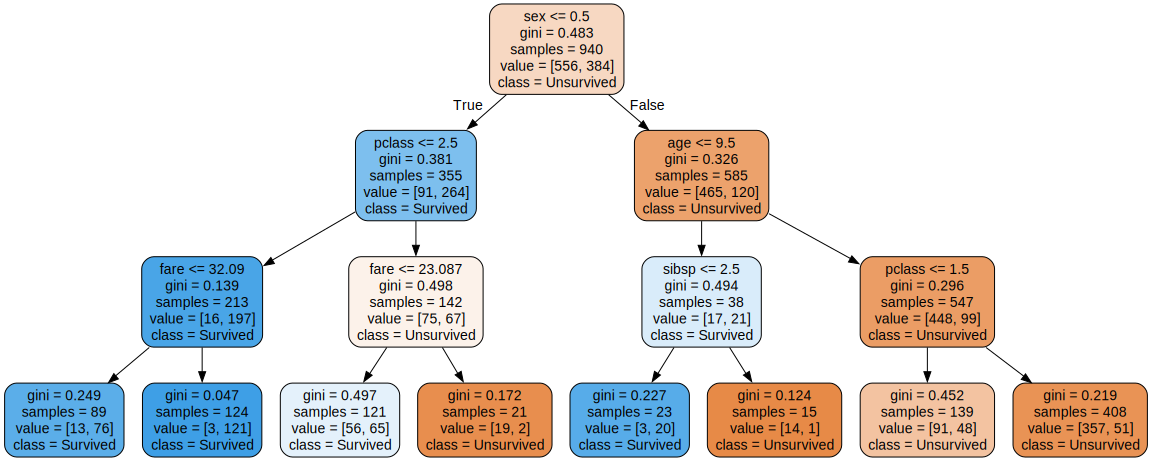

In [40]:
#In [40]
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="titanic.dot",
    feature_names=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'],
    class_names=['Unsurvived', 'Survived'],
    rounded=True,
    filled=True
)

import graphviz
with open("titanic.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='images/decision_trees', cleanup=True)
dot

결정 나무를 얻었다. 한 단계 한 단계 밑으로 내려오면 왜 survived라고 판별했는지 아닌지를 알 수 있다. 이것을 가지고 예측을 할 수 있다.

In [41]:
#In [41]
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)

Test Accuracy is  84.76190476190476


이제 테스트 데이터를 가지고 다시 정확도를 확인한 결과 84.76%가 나왔다. 우리의 모델은 이것으로 일단 쓸만하다고 생각할 수 있다.

## 7.8 생존자 예측
    - 디카프리오는 정말 생존할 수 없었을까?

이제 영화 속 두 사람의 가상 인물은 타이타닉에 탑승한 실제 승객이라고 가정해보자. 영화 속 주인공인 디카프리오는 3등실 객실 남성으로 극 중 나이는 19살이다. 부모, 형제, 자녀 없이 홀로 아주 저렴한 가격인 5달러에 탑승했다고 가정하자. 윈슬렛은 1등실에 탑승한 여성으로 극 중 나이는 17살이었으며, 어머니, 그리고 약혼자와 함께 탑승했다. 그래서 이 두 사람의 데이터는 코드 42와 같이 특정했다.

In [42]:
#In [42]
# pclass, sex, age, sibsp, parch, fare
dicaprio = [3., 1., 19., 0., 0., 5.]
winslet = [1., 0., 17., 1., 1., 100.]

윈슬릿의 생존율을 알고 싶으면, 코드 39에서 만든 모델인 tree_clf에서 predict_proba를 이용하면 된다.

In [43]:
#In [43]
tree_clf.predict_proba([winslet])

array([[0.02419355, 0.97580645]])

In [44]:
#In [44]
tree_clf.predict_proba([dicaprio])

array([[0.875, 0.125]])

여기서 보면 윈슬릿의 비생존/생존 비율, 디카프리오의 비생존/생존 비율이 각각 나타난다. 이것을 더 잘 표현하기 위해 함수로 추가 작업을 했다.

In [45]:
#In [45]
def isSurvived(name, person):
    isSurvive = 'not Survived' if tree_clf.predict([person])[0] == 0 else 'survived'
    print(name, ' is ', isSurvive, ' --> ', max(tree_clf.predict_proba([person])[0]))

isSurvived('Dicaprio', dicaprio)
isSurvived('Winslet', winslet)

Dicaprio  is  not Survived  -->  0.875
Winslet  is  survived  -->  0.9758064516129032


isSurvived라는 함수를 만들었다. 그 안에는 isSurvive라는 변수에 생존할지 아닌지를 판정해서 생존율이 높으면 생존율로, 낮으면 비생존율로 답변을 하도록 한다. 이렇게 내린 결론은 디카프리오가 생존하지 못할 확률은 87.75%라는 것이다. 반면, 윈슬릿이 생존할 확률은 97.58%이다.  

이번 장에서는 데이터를 이용해 전반적으로 상황을 관찰해서 분석하고, 또 인공지능의 일부 기능을 이용해서 생존자를 예측해보는 일도 배워봤다.